# Notebook 1.3 - PyTorch linear model

The purpose of this notebook is:
- To understand training procedure in pytorch
    - optimizer
    - loss function
    - backward procedure
    
## Required packages

In [ ]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
! pip instal matplotlib

In [1]:
import torch
import matplotlib.pyplot as plt

Crate linear model
$y = w \cdot x + b$

In [2]:
x = torch.tensor([0.5])
# create linear model
torch.manual_seed(42)
lin_model = torch.nn.Linear(1,1)
lin_model(x)

tensor([1.2123], grad_fn=<AddBackward0>)

In [3]:
print("weight = {}".format(lin_model.weight))
print("bias = {}".format(lin_model.bias))
torch.matmul(lin_model.weight, x) + lin_model.bias

weight = Parameter containing:
tensor([[0.7645]], requires_grad=True)
bias = Parameter containing:
tensor([0.8300], requires_grad=True)


tensor([1.2123], grad_fn=<AddBackward0>)

## Generate artifical data
We assumed linear relation between input $x$ and output $y$.

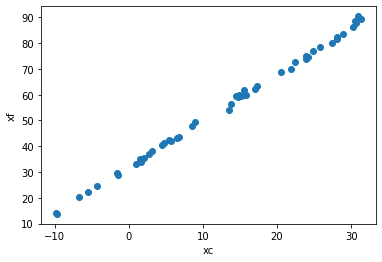

In [4]:
N = 50
xc = torch.rand(N,1) * 43 - 10
xf = 9/5 * xc + 32 + torch.randn(N,1)
plt.scatter(xc.numpy(),xf.numpy())
plt.xlabel("xc")
plt.ylabel("xf")
plt.show()

## Start simple training

Initial values of model parameters

In [5]:
print(lin_model.parameters())
list(lin_model.parameters())

<generator object Module.parameters at 0x000002BBD4EA9AC0>


[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

Define optimizer

In [6]:
optimizer = torch.optim.SGD(lin_model.parameters(), lr=1e-3)

Define loss function

In [15]:
def loss_fnc(y_p, y_t): 
    squared_error= (y_p - y_t)**2 
    return squared_error.mean()

Define training procedure

In [8]:
def training(n_epochs, optimizer, model, loss_fnc, x, y_t):
    for epoch in range(1, n_epochs+1):
        y_p = model(x)
        loss = loss_fnc(y_p, y_t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 100 == 0:
            print("Epoch {}, training loss {}".format(epoch,loss.item()))

In [9]:
training(6000, optimizer, lin_model, loss_fnc, xc, xf)

Epoch 1, training loss 2147.715087890625
Epoch 2, training loss 687.3211059570312
Epoch 3, training loss 477.2061462402344
Epoch 100, training loss 369.9415588378906
Epoch 200, training loss 307.8321228027344
Epoch 300, training loss 256.1723937988281
Epoch 400, training loss 213.20436096191406
Epoch 500, training loss 177.46542358398438
Epoch 600, training loss 147.73959350585938
Epoch 700, training loss 123.01500701904297
Epoch 800, training loss 102.45032501220703
Epoch 900, training loss 85.34546661376953
Epoch 1000, training loss 71.1185302734375
Epoch 1100, training loss 59.28522491455078
Epoch 1200, training loss 49.44282150268555
Epoch 1300, training loss 41.25642395019531
Epoch 1400, training loss 34.44733810424805
Epoch 1500, training loss 28.783811569213867
Epoch 1600, training loss 24.07318878173828
Epoch 1700, training loss 20.155088424682617
Epoch 1800, training loss 16.896242141723633
Epoch 1900, training loss 14.185683250427246
Epoch 2000, training loss 11.9311733245849

Visual inspection of model fitting

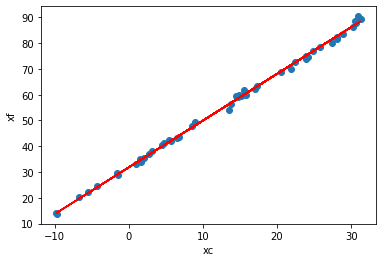

In [10]:
xc_sorted, _ = torch.sort(xc)
lin_model.eval()
y_p = lin_model(xc_sorted)
plt.scatter(xc.numpy(), xf.numpy())
plt.plot(xc_sorted.detach().numpy(), y_p.detach().numpy(),'r')
plt.xlabel("xc")
plt.ylabel("xf")
plt.show()

In [11]:
list(lin_model.parameters())

[Parameter containing:
 tensor([[1.8157]], requires_grad=True),
 Parameter containing:
 tensor([31.7993], requires_grad=True)]

In [27]:
print("w = {}, b = {}".format(9/5,32))

w = 1.8, b = 32


## Training with validation set

In [17]:
def training2(n_epochs, optimizer, model, loss_fnc, x_tr, y_t_tr, x_vl, y_t_vl):
    for epoch in range(1, n_epochs+1):
        y_p = model(x_tr)
        loss = loss_fnc(y_p, y_t_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_p = model(x_vl)
        val_loss = loss_fnc(y_p, y_t_vl)
        if epoch <= 3 or epoch % 100 == 0:
            print("Epoch {}, training loss {}, validation loss {}".format(epoch,loss.item(),val_loss.item()))

Split trainig set into training and validation (on random).
Initial a new model and run training

In [21]:
n_val = int(0.2 * N) 
shuffled_indices = torch.randperm(N)
tr_ind = shuffled_indices[:-n_val] 
vl_ind = shuffled_indices[-n_val:]
torch.manual_seed(42)
lin_model2 = torch.nn.Linear(1,1)
optimizer = torch.optim.SGD(lin_model2.parameters(), lr=1e-3)
training2(6000, optimizer, lin_model2, loss_fnc, xc[tr_ind], xf[tr_ind], xc[vl_ind], xf[vl_ind])

Epoch 1, training loss 2212.298583984375, validation loss 724.8092041015625
Epoch 2, training loss 629.789794921875, validation loss 605.9923095703125
Epoch 3, training loss 430.01446533203125, validation loss 600.3106079101562
Epoch 100, training loss 341.3152770996094, validation loss 515.56103515625
Epoch 200, training loss 288.8346862792969, validation loss 436.4503479003906
Epoch 300, training loss 244.44479370117188, validation loss 369.5102233886719
Epoch 400, training loss 206.89828491210938, validation loss 312.86651611328125
Epoch 500, training loss 175.14027404785156, validation loss 264.93389892578125
Epoch 600, training loss 148.27816772460938, validation loss 224.3709716796875
Epoch 700, training loss 125.55721282958984, validation loss 190.0430908203125
Epoch 800, training loss 106.33906555175781, validation loss 160.99063110351562
Epoch 900, training loss 90.0837173461914, validation loss 136.4016571044922
Epoch 1000, training loss 76.33439636230469, validation loss 115

Visual inspection of model fitting

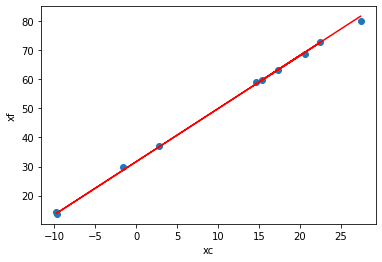

In [22]:
xc_sorted, _ = torch.sort(xc[vl_ind])
lin_model.eval()
y_p = lin_model2(xc_sorted)
plt.scatter(xc[vl_ind].numpy(), xf[vl_ind].numpy())
plt.plot(xc_sorted.detach().numpy(), y_p.detach().numpy(),'r')
plt.xlabel("xc")
plt.ylabel("xf")
plt.show()

## Ensure that data would not be inclueded in gradient calculation

In [23]:
def training3(n_epochs, optimizer, model, loss_fnc, x_tr, y_t_tr, x_vl, y_t_vl):
    for epoch in range(1, n_epochs+1):
        y_p = model(x_tr)
        loss = loss_fnc(y_p, y_t_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_p = model(x_vl)
            val_loss = loss_fnc(y_p, y_t_vl)
            assert val_loss.requires_grad == False
        if epoch <= 3 or epoch % 100 == 0:
            print("Epoch {}, training loss {}, validation loss {}".format(epoch,loss.item(),val_loss.item()))

In [25]:
torch.manual_seed(42)
lin_model3 = torch.nn.Linear(1,1)
optimizer = torch.optim.SGD(lin_model3.parameters(), lr=1e-3)
training3(6000, optimizer, lin_model3, loss_fnc, xc[tr_ind], xf[tr_ind], xc[vl_ind], xf[vl_ind])

Epoch 1, training loss 2212.298583984375, validation loss 724.8092041015625
Epoch 2, training loss 629.789794921875, validation loss 605.9923095703125
Epoch 3, training loss 430.01446533203125, validation loss 600.3106079101562
Epoch 100, training loss 341.3152770996094, validation loss 515.56103515625
Epoch 200, training loss 288.8346862792969, validation loss 436.4503479003906
Epoch 300, training loss 244.44479370117188, validation loss 369.5102233886719
Epoch 400, training loss 206.89828491210938, validation loss 312.86651611328125
Epoch 500, training loss 175.14027404785156, validation loss 264.93389892578125
Epoch 600, training loss 148.27816772460938, validation loss 224.3709716796875
Epoch 700, training loss 125.55721282958984, validation loss 190.0430908203125
Epoch 800, training loss 106.33906555175781, validation loss 160.99063110351562
Epoch 900, training loss 90.0837173461914, validation loss 136.4016571044922
Epoch 1000, training loss 76.33439636230469, validation loss 115

Visual inspection of model

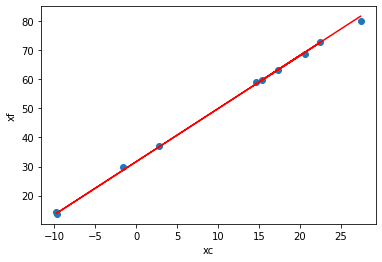

In [26]:
xc_sorted, _ = torch.sort(xc[vl_ind])
lin_model.eval()
y_p = lin_model3(xc_sorted)
plt.scatter(xc[vl_ind].numpy(), xf[vl_ind].numpy())
plt.plot(xc_sorted.detach().numpy(), y_p.detach().numpy(),'r')
plt.xlabel("xc")
plt.ylabel("xf")
plt.show()